### Testing Evo

#### Imports

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import torch_geometric
from torch_geometric.nn import GCNConv
import IPython
from IPython.display import display, HTML, Image

from graphUtils import add_edges
from generator import generate_organism
from cell import Cell
from organism import Organism
from GNCAmodel import GNCA
from visualizer import Visualizer
from evo_trainer import Evo_Trainer

#%run Visualizer.py # --allows for reloading the particular code

#### Train the network

In [2]:
n = 5
popsize = 10
generations = 300
wrap_around = True
name = 'centered8'
#device = torch.device('mps:0')
device = torch.device('cpu')
#trainer = Evo_Trainer(n, device)
trainer = Evo_Trainer(n, device, True, popsize)

2023-02-28 16:44:59,209	INFO worker.py:1528 -- Started a local Ray instance.


[2023-02-28 16:45:01] INFO     <78789> evotorch.core: Instance of `Custom_NEProblem` (id:4391442304) -- The `dtype` for the problem's decision variables is set as torch.float32
[2023-02-28 16:45:01] INFO     <78789> evotorch.core: Instance of `Custom_NEProblem` (id:4391442304) -- `eval_dtype` (the dtype of the fitnesses and evaluation data) is set as torch.float32
[2023-02-28 16:45:01] INFO     <78789> evotorch.core: Instance of `Custom_NEProblem` (id:4391442304) -- The `device` of the problem is set as cpu
[2023-02-28 16:45:01] INFO     <78789> evotorch.core: Instance of `Custom_NEProblem` (id:4391442304) -- The number of actors that will be allocated for parallelized evaluation is 10
[2023-02-28 16:45:01] INFO     <78789> evotorch.core: Instance of `Custom_NEProblem` (id:4391442304) -- Number of GPUs that will be allocated per actor is None


/Users/martinholst/miniconda3/envs/AML/lib/python3.10/site-packages/evotorch/tools/misc.py:1107: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  result = torch.tensor(data, **kwargs)


In [3]:
trainer.train(generations, name)

         iter : 1
     stepsize : ReadOnlyTensor(0.0989)
    mean_eval : 279.6000061035156
pop_best_eval : 331.0
  median_eval : 265.0

         iter : 2
     stepsize : ReadOnlyTensor(0.0979)
    mean_eval : 290.20001220703125
pop_best_eval : 376.0
  median_eval : 310.0

         iter : 3
     stepsize : ReadOnlyTensor(0.0970)
    mean_eval : 371.8999938964844
pop_best_eval : 486.0
  median_eval : 360.0

         iter : 4
     stepsize : ReadOnlyTensor(0.0961)
    mean_eval : 342.8999938964844
pop_best_eval : 409.0
  median_eval : 321.0

         iter : 5
     stepsize : ReadOnlyTensor(0.0953)
    mean_eval : 330.1000061035156
pop_best_eval : 382.0
  median_eval : 328.0

         iter : 6
     stepsize : ReadOnlyTensor(0.0946)
    mean_eval : 356.20001220703125
pop_best_eval : 428.0
  median_eval : 331.0

         iter : 7
     stepsize : ReadOnlyTensor(0.0939)
    mean_eval : 350.6000061035156
pop_best_eval : 422.0
  median_eval : 346.0

         iter : 8
     stepsize : ReadOnlyTens

In [4]:
network = trainer.get_trained_network()

In [5]:
#network = trainer.problem.parameterize_net(trainer.searcher.status['best'][0])
network = trainer.problem.parameterize_net(trainer.searcher.status['center'][0])
#network = trainer.problem.parameterize_net(trainer.searcher.status['obj0_pop_best'])
#network = trainer.problem.parameterize_net(trainer.searcher.status['obj4_pop_best'])

In [6]:
#trainer.searcher.status

#### Visualize trained network

In [7]:
organism = generate_organism(n, device)
graph = organism.toGraph()
visualizer = Visualizer(wrap_around)
network(graph, 0)

Data(x=[55, 5], edge_index=[1, 0], device=cpu, attr=[1], velocity=[2], border_cost=0.0, food_reward=0.0, dead_cost=0.0, visible_food=0.0, food_avg_dist=0.0, food_avg_degree=0.0)

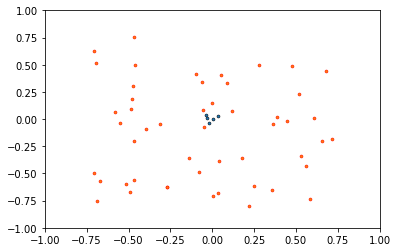

In [8]:
anim = visualizer.animate_organism(graph, network, food=30, frames=200)
visualizer.save_animation_to_gif(anim, name, 10)

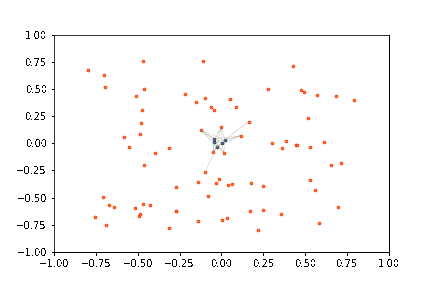

In [9]:
Image('../animation/' + name + '.gif')

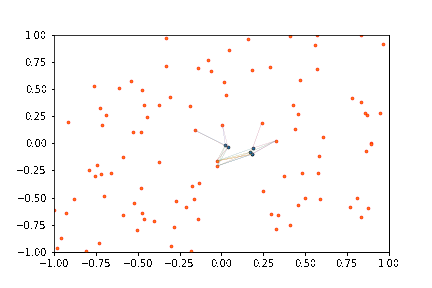

In [10]:
Image('../animation/GATConv1.gif')

In [11]:
anim.frame_seq = anim.new_saved_frame_seq() 
IPython.display.HTML(anim.to_jshtml())

In [12]:
print(network)

CGConv1(
  (conv_layer_cells): CGConv(4, dim=4)
  (conv_layer_food): CGConv(4, dim=4)
  (mlp_before): Sequential(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): Tanh()
  )
  (mlp_middle): Sequential(
    (0): Tanh()
    (1): Linear(in_features=8, out_features=4, bias=True)
    (2): Tanh()
  )
  (mlp): Sequential(
    (0): Tanh()
    (1): Linear(in_features=4, out_features=2, bias=True)
    (2): Tanh()
  )
  (gConvGRU): GConvGRU(
    (conv_x_z): ChebConv(4, 4, K=1, normalization=sym)
    (conv_h_z): ChebConv(4, 4, K=1, normalization=sym)
    (conv_x_r): ChebConv(4, 4, K=1, normalization=sym)
    (conv_h_r): ChebConv(4, 4, K=1, normalization=sym)
    (conv_x_h): ChebConv(4, 4, K=1, normalization=sym)
    (conv_h_h): ChebConv(4, 4, K=1, normalization=sym)
  )
)


In [13]:
print('conv_layers1: ', network.conv_layer_cells)
for param in network.conv_layer_cells.parameters():
  print(param.data)

print('conv_layers2: ', network.conv_layer_food)
for param in network.conv_layer_food.parameters():
  print(param.data)

conv_layers1:  CGConv(4, dim=4)
tensor([[-0.1881, -1.4925, -0.4751, -1.1198, -0.0850, -0.4221, -0.6176, -0.0121,
         -0.3631, -0.2042,  0.0816, -0.6796],
        [-0.1266, -0.7597,  0.6377, -0.8917,  0.9149, -0.4925, -0.0297,  0.2524,
         -0.4665,  0.8941,  0.0220,  0.1520],
        [-0.6407, -0.2436, -1.0963, -0.6573,  1.7821,  0.7334,  0.0511,  0.2132,
          1.3323, -0.5558, -0.7595,  0.2445],
        [-0.2299, -0.5087,  0.9529, -1.0822, -1.2239,  1.1223,  1.7723,  0.6075,
         -0.0556, -0.8689, -0.6192,  0.4315]])
tensor([-0.8585,  0.9975,  0.8080, -0.2158])
tensor([[ 1.2195e+00, -6.4447e-01, -5.4492e-01,  6.8019e-01,  2.0889e-01,
         -8.2814e-01, -4.4423e-01,  3.4722e-01, -1.2152e+00, -1.0770e+00,
         -6.4625e-01,  5.3106e-01],
        [-1.0322e+00,  1.1482e+00, -9.0735e-01, -5.2265e-01,  5.7201e-01,
          2.8857e-01, -5.2048e-01, -1.5730e+00,  4.9721e-01, -3.8133e-01,
         -5.4513e-01, -1.4735e+00],
        [-1.7471e-03,  5.1266e-01, -1.9071e+00

In [14]:
print('GConvGRU: ', network.gConvGRU)
for param in network.gConvGRU.parameters():
  print(param.data)


GConvGRU:  GConvGRU(
  (conv_x_z): ChebConv(4, 4, K=1, normalization=sym)
  (conv_h_z): ChebConv(4, 4, K=1, normalization=sym)
  (conv_x_r): ChebConv(4, 4, K=1, normalization=sym)
  (conv_h_r): ChebConv(4, 4, K=1, normalization=sym)
  (conv_x_h): ChebConv(4, 4, K=1, normalization=sym)
  (conv_h_h): ChebConv(4, 4, K=1, normalization=sym)
)
tensor([ 0.4734,  1.2313, -2.0473,  0.1333])
tensor([[ 0.4690,  1.1098, -0.4574,  0.8153],
        [ 0.8105,  0.3766, -0.1070, -1.0027],
        [ 0.4270,  0.0522, -0.2586,  0.0452],
        [-0.5701, -1.0739,  0.4028,  0.0823]])
tensor([-0.2546, -0.1307, -0.7213, -1.4824])
tensor([[ 1.0007, -0.6806,  0.2874, -0.4728],
        [ 0.3213,  0.2533, -0.9208, -1.0139],
        [ 0.4118,  1.0129, -0.5010,  0.0090],
        [-0.9711,  0.5362, -1.1571,  0.8094]])
tensor([ 0.1325, -0.3075,  0.3085,  1.4905])
tensor([[-0.0762, -0.0346,  0.0247,  0.1621],
        [-0.3621, -0.7732,  0.0086, -0.9757],
        [ 0.5982, -0.2482,  0.4267, -0.3374],
        [ 0.3802

In [15]:
%%javascript
IPython.notebook.save_notebook()

<IPython.core.display.Javascript object>

#### Visualization of loss:

In [16]:
import matplotlib.pyplot as plt
losses = trainer.logger_df
print(losses)
#plt.plot(losses.stepsize)

#plt.plot(losses.median_eval)
#plt.plot(losses.pop_best_eval)
#plt.plot(losses.mean_eval)
#plt.legend(('median_eval', 'pop_best_eval', 'mean eval'))
plt.show()

                    stepsize   mean_eval  pop_best_eval  median_eval
iter                                                                
1     ReadOnlyTensor(0.0989)  279.600006          331.0        265.0
2     ReadOnlyTensor(0.0979)  290.200012          376.0        310.0
3     ReadOnlyTensor(0.0970)  371.899994          486.0        360.0
4     ReadOnlyTensor(0.0961)  342.899994          409.0        321.0
5     ReadOnlyTensor(0.0953)  330.100006          382.0        328.0
...                      ...         ...            ...          ...
296   ReadOnlyTensor(0.0717)  345.399994          469.0        340.0
297   ReadOnlyTensor(0.0717)  355.100006          468.0        364.0
298   ReadOnlyTensor(0.0716)  346.000000          519.0        323.0
299   ReadOnlyTensor(0.0715)  371.399994          527.0        372.0
300   ReadOnlyTensor(0.0715)  320.399994          429.0        304.0

[300 rows x 4 columns]


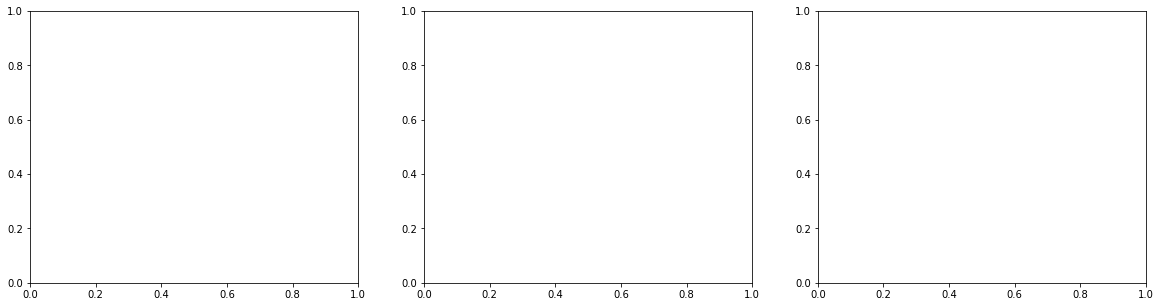

In [17]:
trainer.logger_df
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
fig.suptitle('')
plt.show()